### Литература

1. И.Н. Порублев, А.Н. Ставровский - Алгоритмы и программы. Решение олимпиадных задач<br>
Загружена в канал #edu_materials

# Упражнение 1. Бинарный поиск

Лучший способ искать элемент в отсортированном массиве. Пусть требуется определить индекс $i$ элемента, равного `x`, в упорядоченном по возрастанию массиве $A$. Тогда действовать следует следующим образом:

1. Берем центральный элемент $c$ в массиве $A$

2. Сравниваем $c$ с $x$. Если $c < x$, то элемент, равный $x$ правее $c$ и бинарный поиск применяется к правой половине массива. Если $c < x$, то бинарный поиск соответственно применяется к левой половине массива.

Реализуйте поиск элемента, равного $x$, в рекурсивном и нерекурсивном вариантах.

In [132]:
my_list = [i + 1 for i in range(1)]
x = 1


def binary_search_with_recursion(some_list, some_value, start, finish):
    central_elem = start + (finish - start)//2
    
    print(central_elem)
    if some_list[central_elem] == some_value:
        return central_elem
    elif some_list[central_elem] < some_value:
        return binary_search(some_list, some_value, start=central_elem + 1, finish=finish)
    else:
        return binary_search(some_list, some_value, start=start, finish=central_elem - 1 )
my_list

[1]

In [133]:
binary_search_with_recursion(my_list, x, 0, len(my_list))

0


0

In [134]:
def binary_search_with_loop(some_list, some_value):
    start = 0
    finish = len(some_list)
    found = False
    while not found:
        central_elem = start + (finish - start)//2
        if some_list[central_elem] == some_value:
            found = True
            ans = central_elem
        elif some_list[central_elem] > some_value:
            finish = central_elem
        else:
            start = central_elem
    return ans


In [135]:
binary_search_with_loop(my_list, x)

0

# Упражнение 2. Поиск точки максимума в целых числах

По целому $c \ge 1$ найдите целое $a$, при котором $a^{c-a}$ максимально. Используйте бинарный поиск.

In [167]:
c = 3
function_list = [i**(c - i) for i in range(0, c)]
max_value = max(function_list)



def binary_search_for_max(some_list):
    start = 0
    finish = len(some_list)
    found = False
    while not found:
        central_elem = (start + finish)//2
        if central_elem == 0 or central_elem == len(some_list) - 1:
            found = True
            ans = central_elem
        elif (some_list[central_elem] > some_list[central_elem - 1] and 
             some_list[central_elem] > some_list[central_elem + 1]):
            found = True
            ans = central_elem
        elif some_list[central_elem] < some_list[central_elem - 1]:
            finish = central_elem
        else:
            start = central_elem
    return ans

binary_search_for_max(function_list)

1
2


2

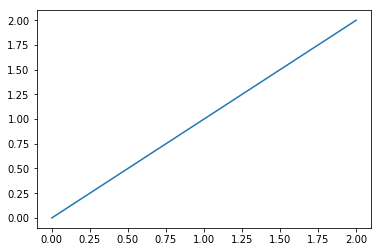

In [168]:
import matplotlib.pyplot as plt
plt.plot(function_list)

# Упражнение 3. $k$-й по величине элемент

Найти $k$-е по величине значение в массиве из $N$ элементов (не сортируя массив полностью). Если сами не придумаете, есть подсказка к задаче 5.6 на стр. 438 в [1].

In [211]:
import random
k = 3
N = 10
my_list = [i for i in range(N)]
random.shuffle(my_list)
k_list = [my_list[0]]

i = 1
my_list

[8, 9, 2, 5, 1, 3, 4, 0, 6, 7]

In [215]:
while i < N:
    if len(k_list) < k:
        k_list.append(my_list[i])
    else:
        k_list = sorted(k_list)
        if my_list[i] > k_list[-1]:
            pass
        else:
            k_list[-1] = my_list[i]
    print(i, k_list)
    i +=1
print(f"{k}-й элемент: ", k_list[-1])

3-й элемент:  2


# Упражнение 4. Разбиение Ломуто

Реализуйте быструю сортировку на основе [разбиения Ломуто](https://en.wikipedia.org/wiki/Quicksort#Lomuto_partition_scheme).

# Упражнение 5. Задача флага Нидерландов

Пусть есть массив, элементы которого равны одному из чисел 0, 1, 2. Как упорядочить такой массив возрастанию в один проход?<br>
Попробуйте придумать решение самостоятельно, а затем сравните с алгоритмом, описанном [здесь](https://neerc.ifmo.ru/wiki/index.php?title=Dutch_national_flag_problem). Реализуйте быструю сортировку на основе описанного разбиения. Функция `partition()` должна разбивать массив на 3 части: в первой должны быть элементы меньше опорного, во второй - равные опорному, в третей - элементы больше опорного.

> [Здесь](https://algs4.cs.princeton.edu/lectures/23DemoPartitioning.pdf) есть демонстрация работы разбиения под названием "Dijkstra 3-way partitioning" 

> Запись `++` может обозначать либо префиксный, либо постфиксный инкремент, в зависимости от того, где расположен операнд. Инструкция
```c++
a = ++i
```
содержит оператор "префиксный инкремент", который сначала увеличивает `i` на 1, а затем возвращает значение `i`. Например, если `i == 0`, то после выполнения инструкции `i == 1`, `a == 1`. В следующем фрагменте показан постфиксный инкремент.
```c++
a = i++
```
В этом случае сначала возвращается значение `i` до увеличения, а затем уже выполняется увеличение `i` на 1. Пусть `i == 0`, тогда в конце получится `i == 1`, `a == 0`.

> Перед тем обменивать 

# Упражнение 6. Быстрая сортировка на 2-х опорных элементах (dual pivot quicksort)

Есть улучшенная версия разбиения из упражнения 5. Выбираются **2** различных опорных элемента, и меньший из которых $p_1$ располагается в начале массива, а больший $p_2$ в конце массива. Если такие опорные элементы не удалось выбрать, то массив состоит из одинаковых элементов и уже отсортирован. Далее элементы, находящиеся между опорными распределяются, как в упражнении 5, но в центральную часть попадают элементы, чье значение $v$ удовлетворяет неравенствам $p_1 \le v \le p_2$. После распределения опорные элементы $p_1$ и $p_2$ присоединяются к центральной части соответственно с начала и с конца. 

Реализация на C есть [тут](https://www.geeksforgeeks.org/dual-pivot-quicksort/)

> [Здесь](https://algs4.cs.princeton.edu/lectures/23DemoPartitioning.pdf) есть демонстрация работы разбиения под названием "dual-pivot partitioning" 

# Упражнение 7. Упорядоченные множества

Два множества целых чисел через пробел записаны в файлах <font color=green>set1.txt</font> и <font color=green>set2.txt</font> в порядке возрастания. Создайте из них третье множество чисел и запишите его в файл в порядке возрастания.

Напишите код для создания третьего множества каждым из перечисленных способов:

1. объединение,

- пересечение,

- разность,

- симметричная разность.

Алгоритм должен быть однопроходным. Не используйте объекты типа `set`.

In [240]:
import random
"""
files preparing
"""
# set1 = sorted([random.randint(0, 20) for i in range(10)])
# set2 = sorted([random.randint(0,10) for i in range(10)])

# with open("set1.txt", 'w') as set1_f:
#     for num in set1:
#         set1_f.write(str(num) + ' ')
        
# with open("set2.txt", 'w') as set2_f:
#     for num in set2:
#         set2_f.write(str(num) + ' ')


In [253]:
with open('set1.txt', 'r') as set1_f:
    set1 = set1_f.readline().split()
with open('set2.txt', 'r') as set2_f:
    set2 = set2_f.readline().split()

In [289]:
def merge(set1, set2):
    i = 0
    j = 0
    set3 = []
    while i < len(set1) and j < len(set2):
        if int(set1[i]) <= int(set2[j]):
            set3.append(int(set1[i]))
            i +=1
        else:
            set3.append(int(set2[j]))
            j +=1
    while i < len(set1):
        set3.append(int(set1[i]))
        i +=1
    while j < len(set2):
        set3.append(int(set2[j]))
        j +=1
    return set3

def intersection(set1, set2):
    i = 0
    j = 0
    set3 = []
    while i < len(set1) and j < len(set2):
        if int(set1[i]) < int(set2[j]):
            curr = int(set1[i])
            i +=1
        elif int(set1[i]) == int(set2[j]):
            set3.append(int(set2[j]))
            j +=1
            i +=1
        else:
            j +=1
    return set3
      
def difference(set1, set2):
    i = 0
    j = 0
    set3 = []
    while i < len(set1) and j < len(set2):
        if int(set1[i]) < int(set2[j]):
            set3.append(int(set1[i]))
            i +=1
        elif int(set1[i]) == int(set2[j]):
            i +=1
            j +=1
        else:
            j +=1
    while i < len(set1):
        set3.append(int(set1[i]))
        i +=1
    return set3

def symm_difference(set1, set2):
    i = 0
    j = 0
    set3 = []
    while i < len(set1) and j < len(set2):
        if int(set1[i]) < int(set2[j]):
            set3.append(int(set1[i]))
            i +=1
        elif int(set1[i]) == int(set2[j]):
            i +=1
            j +=1
        else:
            set3.append(int(set2[j]))
            j +=1
    while i < len(set1):
        set3.append(int(set1[i]))
        i +=1
    while j < len(set2):
        set3.append(int(set2[j]))
        j +=1
    return set3

def create_set3(set1, set2, method):
    if int(method) == 1:
        return merge(set1, set2)
    elif int(method) == 2:
        return intersection(set1, set2)
    elif int(method) == 3:
        return difference(set1, set2)
    elif int(method) == 4:
        return symm_difference(set1, set2)
    else:
        print("wrong method")

In [299]:
print("Choose method from {1, 2, 3, 4}")
method = input()

set3 = create_set3(set1, set2, method)

Choose method from {1, 2, 3, 4}
2


In [300]:
with open("set3.txt", 'w') as set3_f:
    for num in set3:
        set3_f.write(str(num) + ' ')

# Упражнение 8.  Top down merge sort

Напишите рекурсивный вариант сортировки слиянием. Отталкивайтесь кода C, приведенного [тут](https://en.wikipedia.org/wiki/Merge_sort).

In [302]:
def top_down_merge():
    pass
